# 6.1: 1次元入力2クラス分類

## 6.1.1 問題設定

昆虫の重量と性別の人口データを作成する。

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成
np.random.seed(seed=0)  # 乱数を固定
X_min, X_max = 0, 2.5   # Xの範囲
N = 30                  # データ数
col = ['cornflowerblue', 'gray']  # グラフの色
X = np.zeros(N)         # 入力データ
T = np.zeros(N, dtype=np.uint8)  # 目標データ
prm_s = [0.4, 0.8]      # 分布の開始位置
prm_w = [0.8, 1.6]      # 分布の幅
prm_pi = 0.5            # クラス1の比率
for n in range(N):
    r = np.random.rand()
    T[n] = 0 * (r < 0.5) + (r >= prm_pi)
    X[n] = prm_s[T[n]] + np.random.rand() * prm_w[T[n]]

# データ表示
print('X = ', np.round(X, 2))
print('T = ', T)


X =  [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T =  [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


データの表示

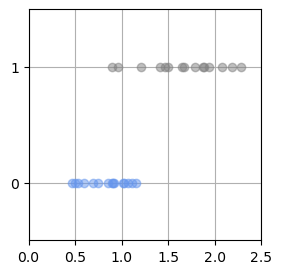

In [11]:
def show_data1d(x, t):
    for k in range(2):
        plt.plot(
            x[t == k], t[t == k], col[k],
            alpha = 0.5, linestyle='none', marker='o'
        )
    plt.xticks(np.arange(0, 3, 0.5))
    plt.yticks([0, 1])
    plt.xlim(X_min, X_max)
    plt.ylim(-0.5, 1.5)

# メイン
fig = plt.figure(figsize=(3, 3))
show_data1d(X, T)
plt.grid()
plt.show()

## 6.1.3 最尤推定

### 尤度とは
その確率であることの適切さを表したもの

例えば、くじを引いたとして、初めの3回は0(ハズレ)、次の1回は1(当たり)という問題を考える。 \
この時、1を引く確率をwとし、w=0.1とすると、 \\
クラスデータT=0, 0, 0, 1がモデルから生成された確率を尤度という。\
実際に尤度を計算してみると、　\
$ 0.9 × 0.9 × 0.9 × 0.1 = 0.072 $
となる\
しかし、w=0.2の時の尤度を計算してみると、
$ 0.8 × 0.8 × 0.8 × 0.2 = 0.102 $
となり、こちらの方が尤度が高く、尤もらしいと言える

### 最尤推定とは
尤度が最も高くなる確率wを求めること。

上の問題で最尤推定をすると、\
$ P(T=0,0,0,1|x) = (1-w)^3 w $ \
このグラフは、上に凸の形になるため最大値を取る値wが尤もらしい値となり、推定値として扱われる。

その後の流れとしては、
1. 対数をとる\
  a. 掛け算を足し算にするため
2. 微分した値　＝　0で計算する

## 6.1.4 ロジスティック回帰モデル

ロジスティック回帰モデルは直線の式をシグモイド関数に通したもの。

直線の式
$$ y = w_0x + w_1 $$
ロジスティック回帰モデル
$$ σ(w_0x + w_1) = 1 / 1 + exp{-(w_0x + w_1)} $$

実際に定義してみる

In [13]:
# ロジスティック回帰モデル
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

ロジスティック回帰モデルを表示する関数

In [14]:
def show_logistic(w):
    x = np.linspace(X_min, X_max, 100)
    y = logistic(x, w)
    plt.plot(x, y, 'gray', linewidth=4)
    # 決定境界
    i = np.min(np.where(y > 0.5))
    boundary = (x[i - 1] + x[i]) / 2
    plt.plot([boundary, boundary], [-0.5, 1.5], 'k--')
    plt.grid(True)
    return boundary

テスト

decision boundary = 1.25


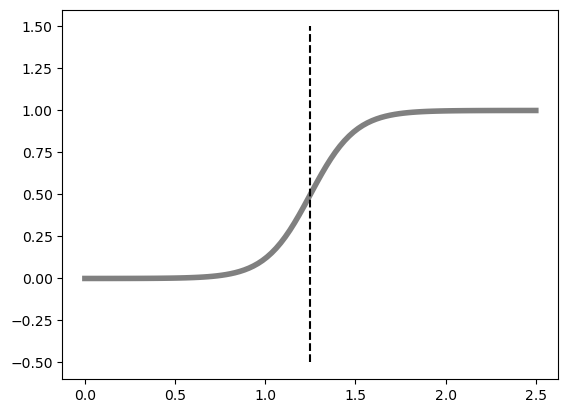

In [15]:
w = np.array([8, -10])
b = show_logistic(w)
print(f'decision boundary = {np.round(b, 2)}')

plt.grid()
plt.show()

## 6.1.5 交差エントロピー誤差

担当　5.7-5.8

5.6-6.1.5まで

## 6.1.6 学習則の導出

## 6.1.7 

担当 6.1.7
範囲 6.1.6-6.2.2
8/1 6.3.1-6.3.2